In [3]:
import pandas as pd

In [22]:
import pandas as pd

ruta_archivo = 'DEBER/data/mnist_train.csv'
df = pd.read_csv(ruta_archivo)
print(df)


      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         5    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1         0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2         4    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3         1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
4         9    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
6873      8    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
6874      6    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
6875      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
6876      6    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
6877      1    0    0    0    0    0    0    0    0    0  ...    NaN    NaN   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
clf = SVC(kernel='linear', C=10, class_weight='balanced')

In [94]:
import numpy as np
# Siempre sacar vacios!
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', kernel='linear')

In [76]:
y_pred = clf.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud en el conjunto de prueba: {accuracy}')

Exactitud en el conjunto de prueba: 0.9178779069767442


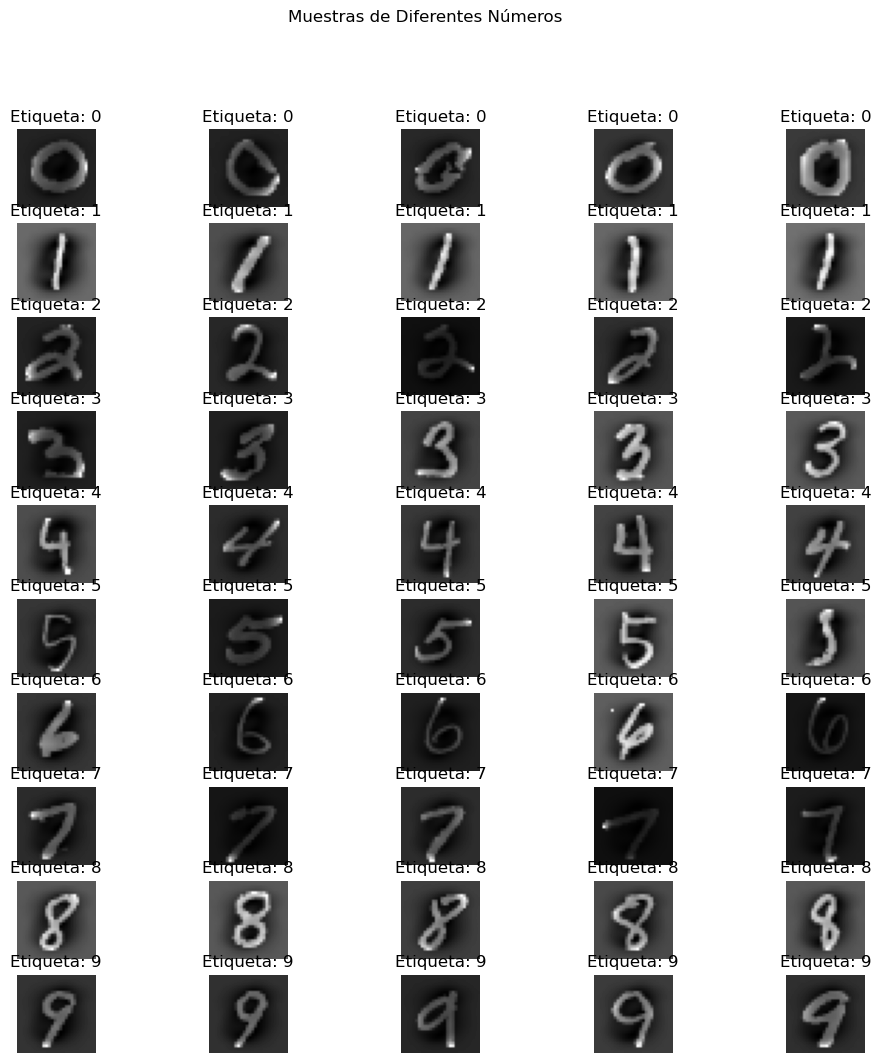

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Para comprobar la exactitud, lo dibujaremod

num_muestras_por_numero = 5

fig, axs = plt.subplots(10, num_muestras_por_numero, figsize=(12, 12), sharex=True, sharey=True)

for numero in range(10):
    
    indices_numero = np.where(y_test == numero)[0][:num_muestras_por_numero]

    for i, indice in enumerate(indices_numero):
        
        imagen = X_test[indice].reshape(28, 28)  # Suponiendo imágenes de 28x28 píxeles
        etiqueta = y_test[indice]

       
        axs[numero, i].imshow(imagen, cmap='gray')
        axs[numero, i].set_title(f'Etiqueta: {etiqueta}')
        axs[numero, i].axis('off')

plt.suptitle('Muestras de Diferentes Números')
plt.show()


